In [17]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df= pd.read_excel('cleandata158.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41365 entries, 0 to 50364
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   41365 non-null  object 
 1   IDSTUD    41365 non-null  int64  
 2   ASBH02A   41365 non-null  object 
 3   ASBH02B   16131 non-null  object 
 4   ASBH03A   40775 non-null  object 
 5   ASBH04    26888 non-null  float64
 6   ASBH15A   23005 non-null  float64
 7   ASBH15B   20263 non-null  float64
 8   ASBH16    39885 non-null  float64
 9   ASBH17A   14850 non-null  float64
 10  ASBH17B   12612 non-null  float64
 11  ASBH18AA  25767 non-null  float64
 12  ASBH18AB  20840 non-null  float64
 13  ASBG01    29510 non-null  float64
 14  ASBG03    28438 non-null  float64
 15  ASBG10A   28638 non-null  float64
 16  ASBG10B   28451 non-null  float64
 17  ASBG10C   28329 non-null  float64
 18  ASBG10D   28259 non-null  float64
 19  ASBG10E   28291 non-null  float64
 20  ASBG10F   28349 non-null  fl

In [19]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASBG10A', 'ASBG10B', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05'


In [20]:
identifier_columns = ['Country', 'IDSTUD']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03']
experience_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

<AxesSubplot:>

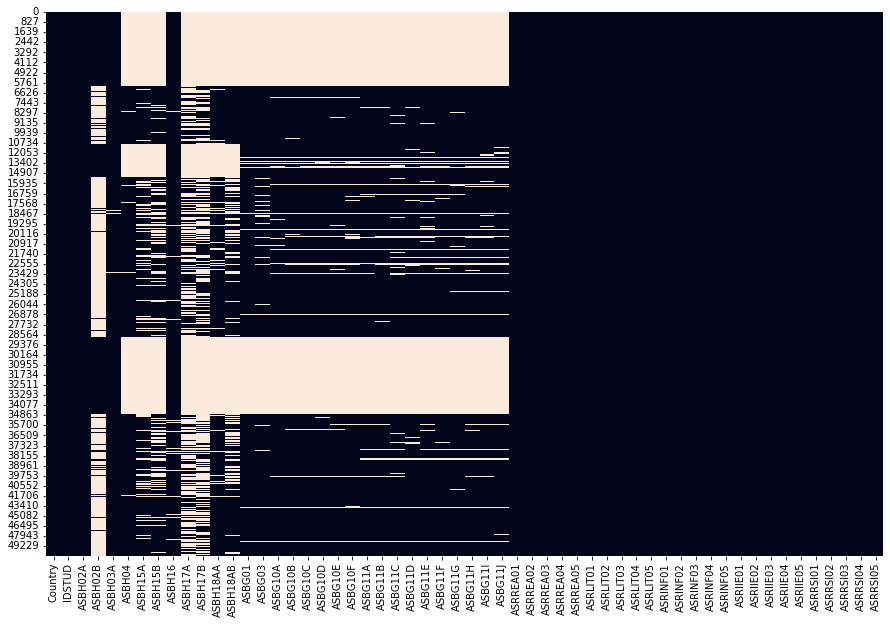

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=False)

The above is very hard to read so we want to do this again but grouping by country this time.

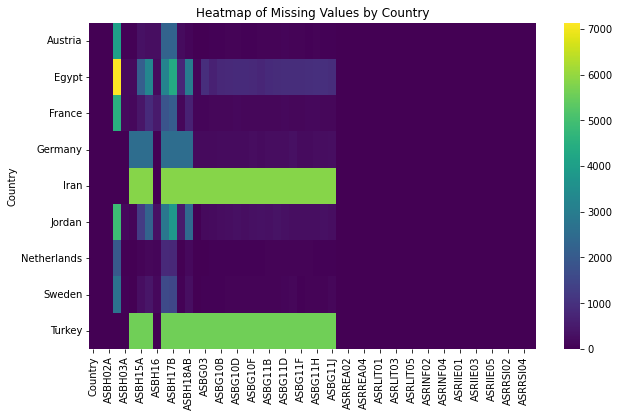

In [25]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

In [26]:
country_sizes = grouped.size()
print(country_sizes)

Country
Austria        4476
Egypt          7354
France         4768
Germany        2515
Iran           5840
Jordan         5801
Netherlands    2026
Sweden         2989
Turkey         5596
dtype: int64


This is still quite difficult to read so I want to break it down even more and look at missing values for the columns that are not pertaining to assessment as these seem to not contain any missing values.

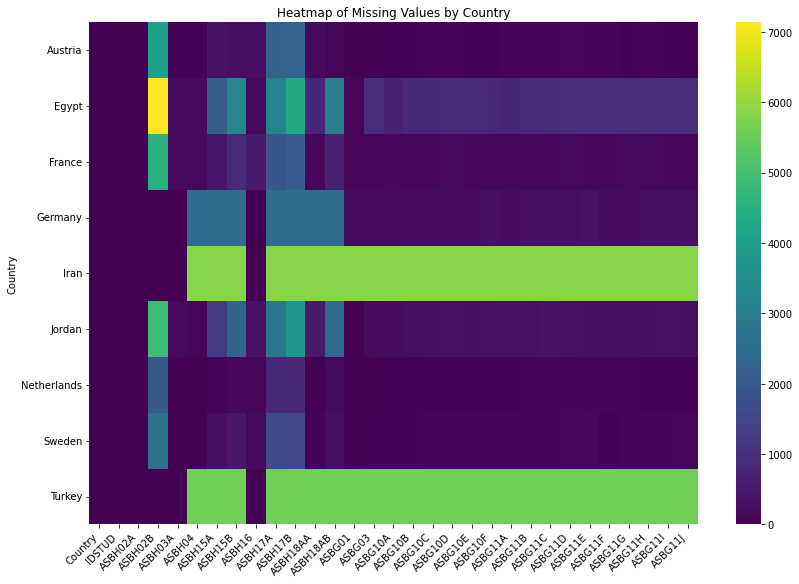

In [27]:
# Select the columns from the DataFrame
non_assessment_columns = identifier_columns + demographic_info_columns + experience_in_school_columns

df_selected = df[non_assessment_columns]

# Perform the Groupby Operation
grouped_selection = df_selected.groupby('Country')

# Aggregate with isnull
missing_values_selection = grouped_selection.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(missing_values_selection, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country')
plt.show()

There is a clear disparancy here between two groups of columns and I want to explore this in more detail. The first group of columns pertains to demographic information and the second group pertains to childrens' experience at school.

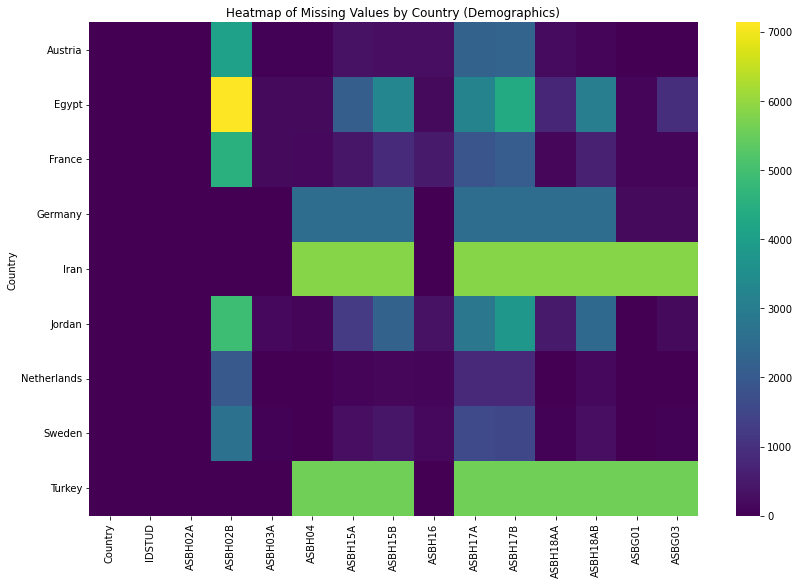

In [28]:
df_demographic = df[identifier_columns + demographic_info_columns]

# Perform the Groupby Operation
grouped_selection_demographic = df_demographic.groupby('Country')

# Aggregate with isnull
missing_values_demographic = grouped_selection_demographic.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
demographicheatmap = sns.heatmap(missing_values_demographic, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Demographics)')
plt.show()

**Egypt** is missing all of **ASBH02B** which is the age of the child when they came to the country and therefore the minimum age of arrival. It seems that **Turkey** and **Iran** are also missing quite a lot of demographic data pertaining to the level of education of parents and their jobs. Also **ASBG01** and **03** which is the sex and how often the language of the test is spoken at home. 

I want to explore these gaps in the Iran and Turkey data a little more. 

The total number of rows for Egypt is 7979. This is helpful to see how many values are missing across the columns.

In [29]:
missing_values_for_country = missing_values_demographic.loc['Egypt']

print(missing_values_for_country)

Country        0
IDSTUD         0
ASBH02A        0
ASBH02B     7134
ASBH03A      179
ASBH04       194
ASBH15A     2114
ASBH15B     3280
ASBH16       180
ASBH17A     3196
ASBH17B     4342
ASBH18AA     766
ASBH18AB    2983
ASBG01        95
ASBG03       925
Name: Egypt, dtype: int64


In [ ]:
# Apply value_counts() to the 'Value' column for each group
value_counts_per_group = grouped['MINAGEARRIVAL'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

In [ ]:
df_cleaned.to_excel('droppednulls.xlsx')

Within this I want to see if there is a difference for immigrant and non-immigrant children as this is my next variable after country. **SEE CLEANING 3**